<a href="https://colab.research.google.com/github/RishabhVenkat/MCS-Patient-and-Healthy-data-using-K-Means-Clustering/blob/main/MCS_Patient_and_Healthy_data_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from a csv file to a Pandas DataFrame
coma_data = pd.read_csv('/content/Combined_new.csv')

In [3]:
# first 5 rows in the dataframe
coma_data.head()

,Stage,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,T3,...,P4,T6,O1,Oz,O2,VEOG,EMG,FCz,hEOG_bi,EMGbi
0,wake,0.898506,0.892530,0.890043,0.884301,0.888179,0.887269,0.902734,0.918779,0.902925,...,0.900804,0.915752,0.902447,0.908493,0.908233,0.728893,0.899645,0.733832,0.731736,0.888462
1,wake,0.893196,0.897950,0.906057,0.900820,0.888904,0.877845,0.908626,0.921243,0.931741,...,0.885650,0.912828,0.899935,0.889221,0.906526,0.716900,0.910329,0.726607,0.768572,0.892856
2,wake,0.895884,0.897901,0.898812,0.897219,0.893512,0.884571,0.899801,0.898925,0.914833,...,0.885005,0.917989,0.897040,0.912006,0.910115,0.731354,0.903914,0.719845,0.753796,0.897482
3,wake,0.888671,0.882936,0.890616,0.882193,0.888837,0.867151,0.889133,0.889438,0.893618,...,0.884148,0.914665,0.910524,0.907781,0.916141,0.701439,0.903294,0.714726,0.728229,0.892324
4,wake,0.918204,0.922137,0.921976,0.907671,0.908472,0.895479,0.910353,0.911577,0.902506,...,0.901469,0.926640,0.914548,0.925689,0.924747,0.734368,0.906524,0.727281,0.750996,0.883454


In [4]:
# finding the number of rows and columns
coma_data.shape

(24925, 27)

In [5]:
# getting some informations about the dataset
coma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24925 entries, 0 to 24924
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Stage    24925 non-null  object 
 1   Fp1      24925 non-null  float64
 2   Fpz      24925 non-null  float64
 3   Fp2      24925 non-null  float64
 4   F7       24925 non-null  float64
 5   F3       24925 non-null  float64
 6   Fz       24925 non-null  float64
 7   F4       24925 non-null  float64
 8   F8       24925 non-null  float64
 9   T3       24925 non-null  float64
 10  C3       24925 non-null  float64
 11  Cz       24925 non-null  float64
 12  C4       24925 non-null  float64
 13  T4       24925 non-null  float64
 14  T5       24925 non-null  float64
 15  P3       24825 non-null  float64
 16  Pz       24825 non-null  float64
 17  P4       24825 non-null  float64
 18  T6       24825 non-null  float64
 19  O1       24825 non-null  float64
 20  Oz       24825 non-null  float64
 21  O2       248

In [6]:
# checking for missing values
coma_data.isnull().sum()

Stage        0
Fp1          0
Fpz          0
Fp2          0
F7           0
F3           0
Fz           0
F4           0
F8           0
T3           0
C3           0
Cz           0
C4           0
T4           0
T5           0
P3         100
Pz         100
P4         100
T6         100
O1         100
Oz         100
O2         100
VEOG       100
EMG        100
FCz        100
hEOG_bi    100
EMGbi      100
dtype: int64

Choosing the F series columns

In [7]:
X = coma_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]].values

In [8]:
print(X)

[[0.89850569 0.89253031 0.89004288 ... 0.88726931 0.90273444 0.91877859]
 [0.89319618 0.89795049 0.90605705 ... 0.87784515 0.90862631 0.9212426 ]
 [0.89588357 0.89790141 0.89881168 ... 0.88457115 0.89980069 0.89892527]
 ...
 [0.87876461 0.87323324 0.88184111 ... 0.85987405 0.87914463 0.88543938]
 [0.86843525 0.8601885  0.86692443 ... 0.85006579 0.86601492 0.86190525]
 [0.85456462 0.85392526 0.84622005 ... 0.83671149 0.85231813 0.85549118]]


Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [9]:
# finding wcss values for different number of clusters

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

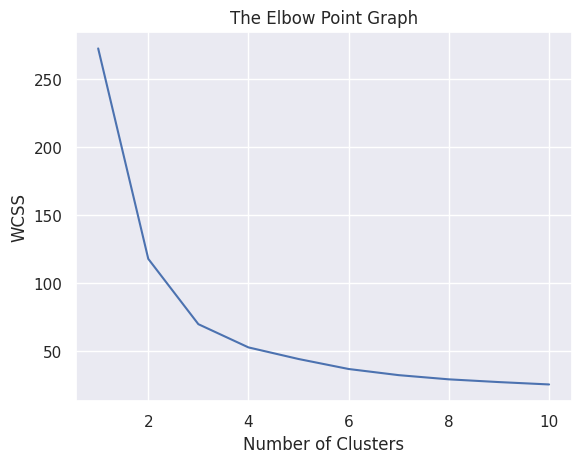

In [10]:
# plot an elbow graph

sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 2

Training the k-Means Clustering Model

In [25]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


3 Clusters - 0, 1

Visualizing all the Clusters

In [26]:
# Check the unique clusters
unique_clusters = np.unique(Y)
print(f"Unique clusters: {unique_clusters}")

Unique clusters: [0 1]


In [27]:
# Verify the centroids
print(f"Number of centroids: {len(kmeans.cluster_centers_)}")

Number of centroids: 2


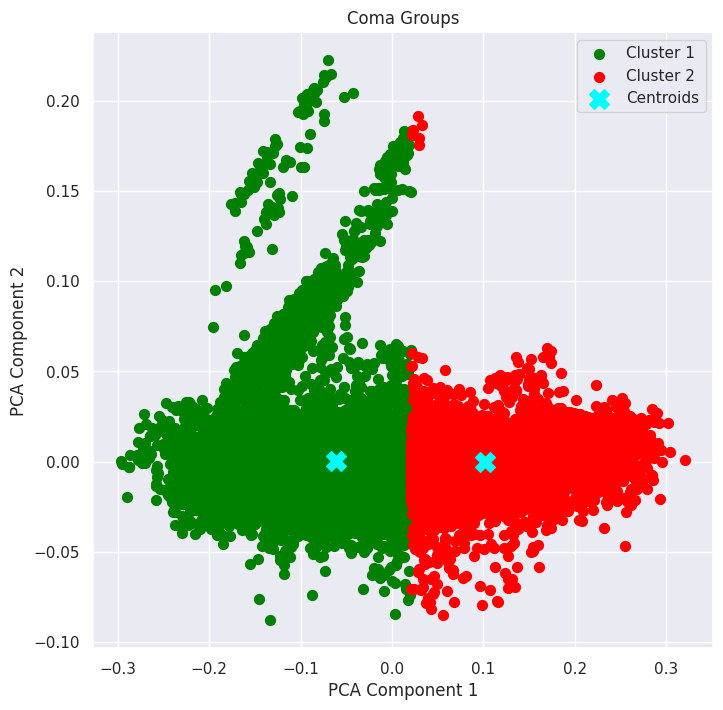

In [28]:
# plotting all the clusters and their Centroids

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your data, Y contains the cluster labels, and kmeans is your KMeans model

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot the clusters in 2D
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[Y == 0, 0], X_pca[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_pca[Y == 1, 0], X_pca[Y == 1, 1], s=50, c='red', label='Cluster 2')


# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='cyan', label='Centroids', marker='X')

plt.title('Coma Groups')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
